# 逻辑回归（简单版本）

---

- [函数式编程](#函数式编程)
- [类式编程](#类式编程)

## 函数式编程

---

### sigmoid函数

#### $$ h_{\theta}(x) = g(\theta^{T}x)$$
#### $$ g(z)=\frac{1}{1+e^{−z}} $$

In [2]:
import numpy as np

def sigmoid(x):
    return 1 / ( 1 + np.exp(-x) )

### 初始化函数

In [3]:
def initialize_params(dims):
    w = np.zeros((dims, 1))
    b = 0
    return w, b

### 逻辑回归

#### 损失函数
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
#### 向量化的损失函数(矩阵形式)
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

---
#### 求偏导(梯度)
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 
#### 向量化的偏导(梯度)
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$

In [5]:
def logistic(X, y, w, b):
    num_train = X.shape[0]
    num_features = X.shape[1]
    
    a = sigmoid(np.dot(X, w) + b)
    cost = -1 / num_train * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))
    dw = np.dot(X.T, (a-y)) / num_train
    db = np.sum(a-y) / num_train
    cost = np.squeeze(cost)
    
    return a, cost, dw, db

### 训练并更新参数

In [8]:
def logistic_train(X, y, learning_rate, epochs):
    w, b = initialize_params(X.shape[1])
    cost_list = []
    
    # 迭代训练
    for i in range(1, epochs):
        # 计算当前模型的结果、损失和下降的梯度
        a, cost, dw, db = logistic(X, y, w, b)
        # 更新参数
        w += - learning_rate * dw
        b += - learning_rate * db
        # 记录损失
        if i % 100 == 0:
            cost_list.append(cost)
            print('epoch {0} cost {1}'.format(i, cost))
        
        # 保存参数
        params = {
            'w': w,
            'b': b
        }
        grads = {
            'dw':dw,
            'db':db
        }
    return cost_list, params, grads

### 预测函数

In [10]:
def predict(X, params):
    y_prediction = sigmoid(np.dot(X, params['w']) + params['b'])
    for i in range(len(y_prediction)):
        if y_prediction[i] > 0.5:
            y_prediction[i] = 1
        else:
            y_prediction[i] = 0
    return y_prediction

### 评估

In [23]:
def accuracy(y_test, y_pred):
    correct_count = 0
    for i in range(len(y_test)):        
        for j in range(len(y_pred)):            
            if y_test[i] == y_pred[j] and i == j:
                correct_count +=1

    accuracy_score = correct_count / len(y_test)    
    return accuracy_score

### 使用sklearn模拟二分类数据进行测试


数据分布展示



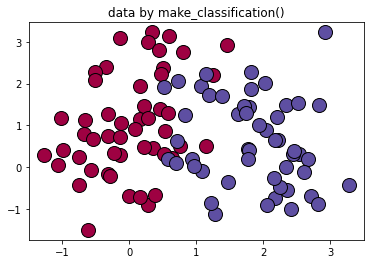


数据划分

X_train= (90, 2)
X_test= (10, 2)
y_train= (90, 1)
y_test= (10, 1)

迭代：

epoch 100 cost 0.5550223646898736
epoch 200 cost 0.48151870160801163
epoch 300 cost 0.43511868362452005
epoch 400 cost 0.4026713088750993
epoch 500 cost 0.3784860032342735
epoch 600 cost 0.3596363521007141
epoch 700 cost 0.34444980457173746
epoch 800 cost 0.3318981690253534
epoch 900 cost 0.3213132967074229
[[0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]]
0.03333333333333333
1.0

逻辑回归



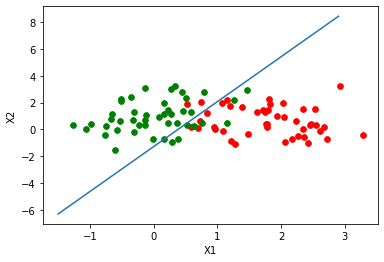

In [26]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, labels = make_classification(
    n_samples=100, 
    n_features=2, 
    n_redundant=0,
    n_informative=2, 
    random_state=1, 
    n_clusters_per_class=2
)
rng=np.random.RandomState(2)
X += 2*rng.uniform(size=X.shape)

unique_labels = set(labels)
colors=plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    x_k=X[labels==k]
    plt.plot(
        x_k[:, 0], 
        x_k[:, 1],
        'o', 
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14
    )
plt.title('data by make_classification()')
print('\n数据分布展示\n')
plt.show()


print('\n数据划分\n')
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], labels[:offset]
X_test, y_test = X[offset:], labels[offset:]
y_train = y_train.reshape((-1,1))
y_test = y_test.reshape((-1,1))

print('X_train=', X_train.shape)
print('X_test=', X_test.shape)
print('y_train=', y_train.shape)
print('y_test=', y_test.shape)

# 训练
print('\n迭代：\n')
cost_list, params, grads = logistic_train(X_train, y_train, 0.01, 1000)

# 预测
y_prediction = predict(X_test, params)
print(y_prediction)

# 打印训练准确率
accuracy_score_train = accuracy(y_train, y_prediction)
print(accuracy_score_train)

# 测试集准确率
accuracy_score_test = accuracy(y_test, y_prediction)
print(accuracy_score_test)

# 划分结果可视化
print('\n逻辑回归\n')
def plot_logistic(X_train, y_train, params):
    n = X_train.shape[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []    
    for i in range(n):        
        if y_train[i] == 1:
            xcord1.append(X_train[i][0])
            ycord1.append(X_train[i][1])        
        else:
            xcord2.append(X_train[i][0])
            ycord2.append(X_train[i][1])
        
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1,s=32, c='red')
    ax.scatter(xcord2, ycord2, s=32, c='green')
    x = np.arange(-1.5, 3, 0.1)
    y = (-params['b'] - params['w'][0] * x) / params['w'][1]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

plot_logistic(X_train, y_train, params)


## 类式编程

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

class logistic_regression():    
    def __init__(self):        
        pass

    def sigmoid(self, x):
        z = 1 / (1 + np.exp(-x))        
        return z    
        
    def initialize_params(self, dims):
        W = np.zeros((dims, 1))
        b = 0
        return W, b    
    
    def logistic(self, X, y, W, b):
        num_train = X.shape[0]
        num_feature = X.shape[1]

        a = self.sigmoid(np.dot(X, W) + b)
        cost = -1 / num_train * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))

        dW = np.dot(X.T, (a - y)) / num_train
        db = np.sum(a - y) / num_train
        cost = np.squeeze(cost)        
        return a, cost, dW, db    
        
    def logistic_train(self, X, y, learning_rate, epochs):
        W, b = self.initialize_params(X.shape[1])
        cost_list = []        
        for i in range(epochs):
            a, cost, dW, db = self.logistic(X, y, W, b)
            W = W - learning_rate * dW
            b = b - learning_rate * db            
            if i % 100 == 0:
                cost_list.append(cost)            
            if i % 100 == 0:
                print('epoch %d cost %f' % (i, cost))

        params = {
            'W': W, 
            'b': b
        }
        grads = {            
            'dW': dW,            
            'db': db
        }        
        
        return cost_list, params, grads    
        
    def predict(self, X, params):
        y_prediction = self.sigmoid(np.dot(X, params['W']) + params['b'])        
        for i in range(len(y_prediction)):            
            if y_prediction[i] > 0.5:
                y_prediction[i] = 1
            else:
                y_prediction[i] = 0

        return y_prediction    
            
    def accuracy(self, y_test, y_pred):
        correct_count = 0
        for i in range(len(y_test)):            
            for j in range(len(y_pred)):                
                if y_test[i] == y_pred[j] and i == j:
                    correct_count += 1

        accuracy_score = correct_count / len(y_test)        
        return accuracy_score    
        
    def create_data(self):
        X, labels = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2)
        labels = labels.reshape((-1, 1))
        offset = int(X.shape[0] * 0.9)
        X_train, y_train = X[:offset], labels[:offset]
        X_test, y_test = X[offset:], labels[offset:]        
        return X_train, y_train, X_test, y_test    
        
    def plot_logistic(self, X_train, y_train, params):
        n = X_train.shape[0]
        xcord1 = []
        ycord1 = []
        xcord2 = []
        ycord2 = []        
        for i in range(n):            
            if y_train[i] == 1:
                xcord1.append(X_train[i][0])
                ycord1.append(X_train[i][1])            
            else:
                xcord2.append(X_train[i][0])
                ycord2.append(X_train[i][1])
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(xcord1, ycord1, s=32, c='red')
        ax.scatter(xcord2, ycord2, s=32, c='green')
        x = np.arange(-1.5, 3, 0.1)
        y = (-params['b'] - params['W'][0] * x) / params['W'][1]
        ax.plot(x, y)
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.show()


(90, 2) (90, 1) (10, 2) (10, 1)
epoch 0 cost 0.693147
epoch 100 cost 0.521480
epoch 200 cost 0.416359
epoch 300 cost 0.347951
epoch 400 cost 0.300680
epoch 500 cost 0.266327
epoch 600 cost 0.240328
epoch 700 cost 0.220002
epoch 800 cost 0.203687
epoch 900 cost 0.190306
{'W': array([[ 2.04608084],
       [-0.03964634]]), 'b': 0.12335926234285086}
train accuracy is: 0.9666666666666667
test accuracy is: 1.0


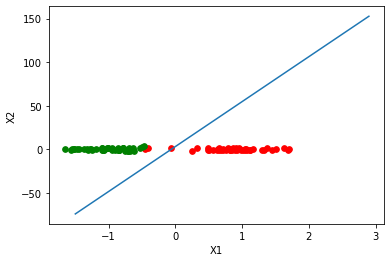

In [31]:

            
if __name__ == "__main__":
    model = logistic_regression()
    X_train, y_train, X_test, y_test = model.create_data()
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    cost_list, params, grads = model.logistic_train(X_train, y_train, 0.01, 1000)
    print(params)
    y_train_pred = model.predict(X_train, params)
    accuracy_score_train = model.accuracy(y_train, y_train_pred)
    print('train accuracy is:', accuracy_score_train)
    y_test_pred = model.predict(X_test, params)
    accuracy_score_test = model.accuracy(y_test, y_test_pred)
    print('test accuracy is:', accuracy_score_test)
    model.plot_logistic(X_train, y_train, params)